In [236]:
from pathlib import Path

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import cufflinks as cf
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


cf.go_offline()
DATA_DIR = Path("../data/processed")
MODEL_DIR = Path("../models")

SEED = 42

data = gpd.read_file(DATA_DIR / "spatial_income_1880.gpkg")
data["is_old"] = data.is_old.astype(int)
data = data.drop(index=data[data.population < 10].index).dropna()
old_idx = data.index
data.reset_index(inplace=True)

In [237]:
N_COMPONENTS = 3
variables = [
    "lutheran",
    # "orthodox",
    "orthodox_proportion",
    # 'is_old',
    "total_income_ln",
    # "estate_income_ln",
    # "salary_pension_income_ln",
    # "business_income_ln",
]
X = StandardScaler().fit_transform(data.loc[:, variables])
pca = PCA(n_components=N_COMPONENTS, random_state=SEED).fit(X)
pca_components = pd.DataFrame(pca.components_.T, index=variables)
pca_transformed = gpd.GeoDataFrame(
    pca.fit_transform(X),
    index=old_idx,
    geometry=data.geometry,
    columns=list(range(1, N_COMPONENTS + 1)),
)
pca_transformed.to_csv(DATA_DIR / "pca_transformed.csv")

factors = FactorAnalysis(
    rotation="varimax", n_components=N_COMPONENTS, random_state=SEED
).fit(X)
factor_components = pd.DataFrame(factors.components_.T, index=variables)
factor_transformed = gpd.GeoDataFrame(
    factors.fit_transform(X),
    index=old_idx,
    geometry=data.geometry,
    columns=list(range(1, N_COMPONENTS + 1)),
)
factor_transformed.to_csv(DATA_DIR / "factor_transformed.csv")

In [238]:
print(
    f"PCA\n"
    f"---\n"
    f"Explained variance: {pca.explained_variance_ratio_.round(2)} \n"
    f"Cumulative:         {pca.explained_variance_ratio_.cumsum().round(2)}"
)

PCA
---
Explained variance: [0.55 0.34 0.11] 
Cumulative:         [0.55 0.89 1.  ]


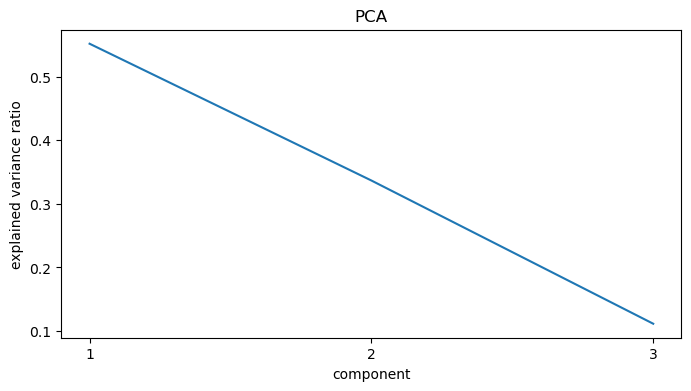

In [239]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

ax.plot(list(range(1, N_COMPONENTS + 1)), pca.explained_variance_ratio_)
ax.set_title("PCA")
ax.set_ylabel("explained variance ratio")
ax.set_xlabel("component")
ax.set_xticks(list(range(1, N_COMPONENTS + 1)))

plt.show()

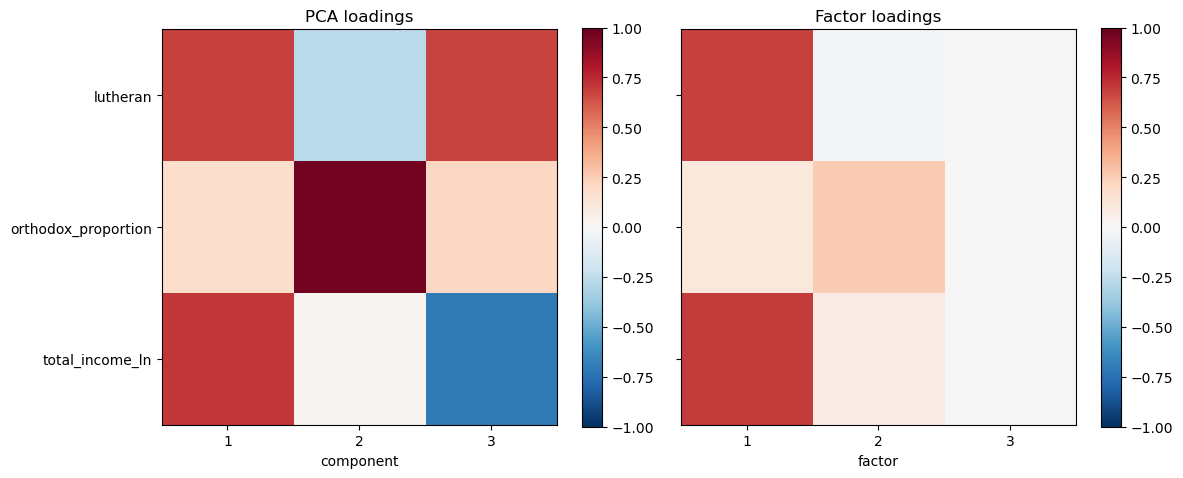

In [240]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

im_1 = ax1.imshow(pca_components, cmap="RdBu_r", vmin=-1, vmax=1)
ax1.set_title("PCA loadings")
ax1.set_xlabel("component")
ax1.set_yticks(list(range(len(variables))))
ax1.set_yticklabels(variables)
ax1.set_xticks(list(range(N_COMPONENTS)))
ax1.set_xticklabels(list(range(1, N_COMPONENTS + 1)))

im_2 = ax2.imshow(factor_components, cmap="RdBu_r", vmin=-1, vmax=1)
ax2.set_title("Factor loadings")
ax2.set_xlabel("factor")
ax2.set_yticks(list(range(len(variables))))
ax2.set_yticklabels(variables)
ax2.set_xticks(list(range(N_COMPONENTS)))
ax2.set_xticklabels(list(range(1, N_COMPONENTS + 1)))

fig.colorbar(im_1, ax=ax1, shrink=0.7)
fig.colorbar(im_2, ax=ax2, shrink=0.7)
fig.tight_layout()

plt.show()

/home/antth/anaconda3/envs/socio-ethnic_segregation/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/home/antth/anaconda3/envs/socio-ethnic_segregation/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



LinAlgError: singular matrix

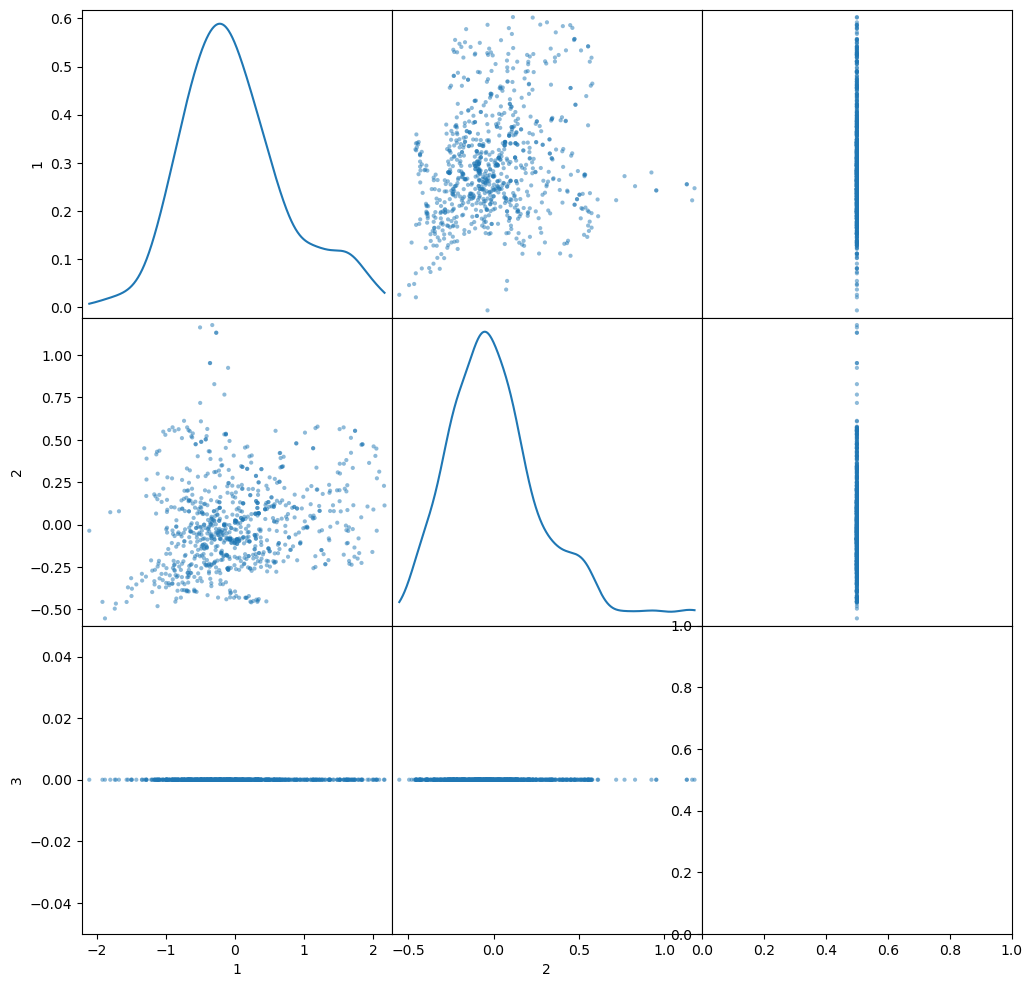

In [241]:
# scatter_matrix(pca_transformed.iloc[:, :4], figsize=(12, 12), diagonal="kde")
scatter_matrix(factor_transformed.iloc[:, :4], figsize=(12, 12), diagonal="kde")
plt.show()

KeyError: 3

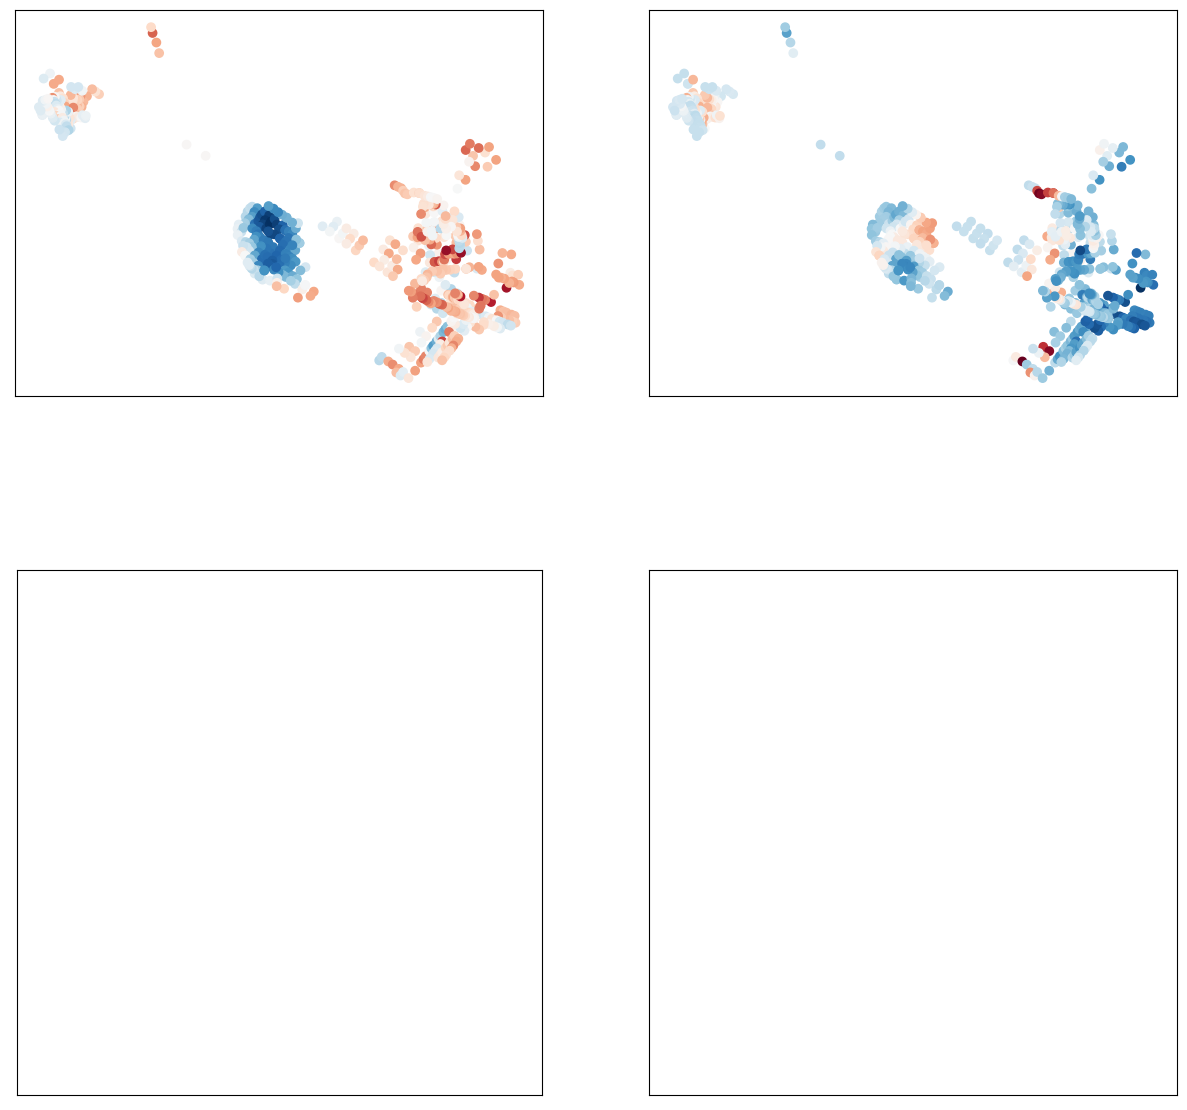

In [ ]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(
    2,
    2,
    figsize=(15, 15),
    subplot_kw={"xticks": [], "yticks": []},
)

factor_transformed.plot(
    column=1,
    cmap="RdBu",
    # legend=True,
    # vmin=-6,
    # vmax=6,
    ax=ax_1,
)
factor_transformed.plot(
    column=2,
    cmap="RdBu_r",
    # legend=True,
    # vmin=-6,
    # vmax=6,
    ax=ax_2,
)
factor_transformed.plot(
    column=3,
    cmap="RdBu_r",
    # legend=True,
    # vmin=-6,
    # vmax=6,
    ax=ax_3,
)
factor_transformed.plot(
    column=4,
    cmap="RdBu_r",
    # legend=True,
    # vmin=-6,
    # vmax=6,
    ax=ax_4,
)
fig.tight_layout()
plt.show()